In [4]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import librosa 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

# Define the path for your 1 second audio files
fireworks_dir = "D:/scriptie/sensor_analysis/CNN-training/data/fireworks1-ogg"
rain_dir = "D:/scriptie/sensor_analysis/CNN-training/data/rain1-ogg"
wind_dir = "D:/scriptie/sensor_analysis/CNN-training/data/wind1-ogg"




In [5]:
# Load the data
data = []
labels = []

for f in os.listdir(fireworks_dir):
    sound_clip,sr = librosa.load(os.path.join(fireworks_dir, f))
    mfcc = librosa.feature.mfcc(y=sound_clip, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfcc.T,axis=0)
    data.append(mfccs_processed)
    labels.append("fireworks")

for f in os.listdir(rain_dir):
    sound_clip,sr = librosa.load(os.path.join(rain_dir, f))
    mfcc = librosa.feature.mfcc(y=sound_clip, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfcc.T,axis=0)
    data.append(mfccs_processed)
    labels.append("rain")

for f in os.listdir(wind_dir):
    sound_clip,sr = librosa.load(os.path.join(wind_dir, f))
    mfcc = librosa.feature.mfcc(y=sound_clip, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfcc.T,axis=0)
    data.append(mfccs_processed)
    labels.append("wind")



In [6]:
# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels to integers
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))





In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

num_labels = 3



In [10]:
# Build model
model = Sequential()

model.add(Convolution1D(128, 5, padding='same', input_shape=(40, 1)))  # Adjust input shape if necessary
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Convolution1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [12]:
# Fit the model
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
52/52 [==============================] - 3s 14ms/step - loss: 4.7479 - accuracy: 0.4579 - val_loss: 1.5393 - val_accuracy: 0.5936
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 2.6163 - accuracy: 0.5930 - val_loss: 0.9023 - val_accuracy: 0.7032
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 1.1282 - accuracy: 0.6536 - val_loss: 0.6578 - val_accuracy: 0.7169
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 0.9798 - accuracy: 0.7065 - val_loss: 0.7075 - val_accuracy: 0.6575
Epoch 5/100
52/52 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.7358 - val_loss: 0.6485 - val_accuracy: 0.7169
Epoch 6/100
52/52 [==============================] - 0s 9ms/step - loss: 0.6602 - accuracy: 0.7534 - val_loss: 0.5842 - val_accuracy: 0.8037
Epoch 7/100
52/52 [==============================] - 0s 9ms/step - loss: 0.5659 - accuracy: 0.7984 - val_loss: 0.5665 - val_accuracy: 0.7534
Epoch 8/100


Epoch 59/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1836 - accuracy: 0.9374 - val_loss: 0.2861 - val_accuracy: 0.9361
Epoch 60/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1719 - accuracy: 0.9452 - val_loss: 0.3425 - val_accuracy: 0.9269
Epoch 61/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1806 - accuracy: 0.9413 - val_loss: 0.3370 - val_accuracy: 0.9315
Epoch 62/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1654 - accuracy: 0.9354 - val_loss: 0.3366 - val_accuracy: 0.9315
Epoch 63/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1703 - accuracy: 0.9374 - val_loss: 0.3861 - val_accuracy: 0.9361
Epoch 64/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1690 - accuracy: 0.9432 - val_loss: 0.4169 - val_accuracy: 0.9178
Epoch 65/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2042 - accuracy: 0.9178 - val_loss: 0.3287 - val_accuracy: 0.9132
Epoch 

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test set accuracy: {accuracy * 100}%")


7/7 [==============================] - 0s 7ms/step - loss: 0.4563 - accuracy: 0.9269
Test set accuracy: 92.69406199455261%


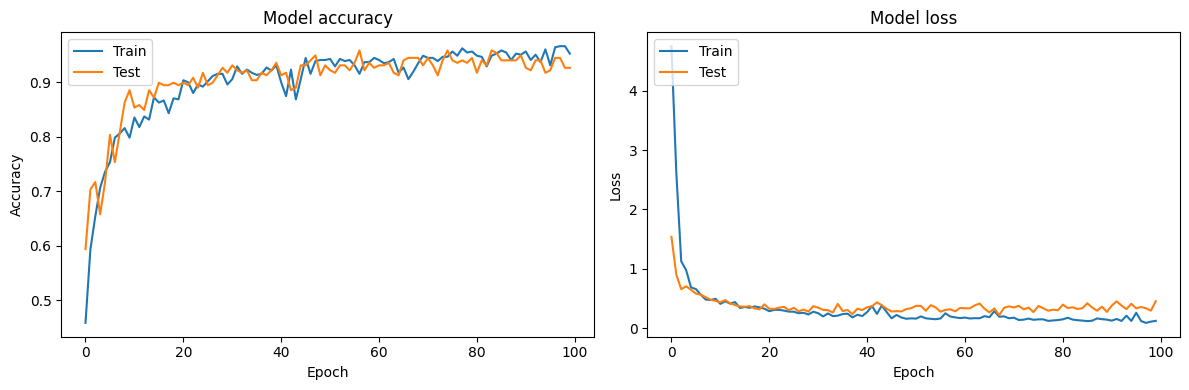

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       104
           1       0.96      0.80      0.88        66
           2       0.91      0.98      0.94        49

    accuracy                           0.93       219
   macro avg       0.93      0.92      0.92       219
weighted avg       0.93      0.93      0.93       219



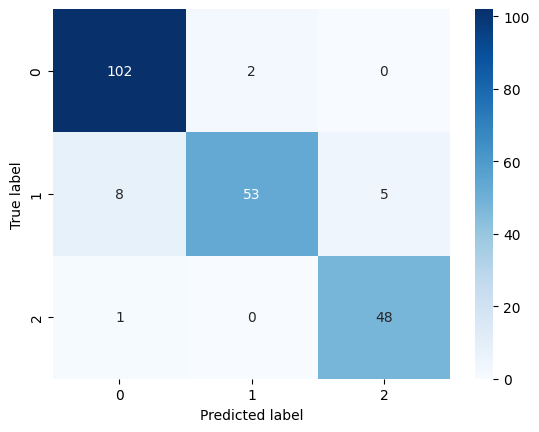

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions
predictions_prob = model.predict(x_test)

# Convert predictions classes to one hot vectors 
predictions = np.argmax(predictions_prob, axis=1) 

# Convert test set labels to one hot vectors
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test_classes, predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
# Save the model
model.save('my_model-1-ogg-mfcc')
model.save('my_model-1-ogg-mfcc.h5')


INFO:tensorflow:Assets written to: my_model-1-ogg-mfcc\assets


INFO:tensorflow:Assets written to: my_model-1-ogg-mfcc\assets
